This study guide should reinforce and provide practice for all of the concepts you have seen in the past week. There are a mix of written questions and coding exercises, both are equally important to prepare you for the sprint challenge as well as to be able to speak on these topics comfortably in interviews and on the job.

If you get stuck or are unsure of something remember the 20 minute rule. If that doesn't help, then research a solution with google and stackoverflow. Only once you have exausted these methods should you turn to your Team Lead - they won't be there on your SC or during an interview. That being said, don't hesitate to ask for help if you truly are stuck.

Have fun studying!

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/bundickm/Study-Guides/master/data/cannabis.csv')
print('Shape:', df.shape, '\n')
df.head()

Shape: (2351, 6) 



,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


# Tokens

## Definitions

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**Natural Language Processing**: `Taking modern language and converting it into a form where a computer can make interpretations on it`

**Token**: `Creating a single object out of a word`

**Corpus**: `A body of text in which you can perform natural NLP`

**Stopwords**: `Words in which do not add to the model creating process that can be left out during NLP`

**Statistical Trimming**: `Removing words during cleaning of tokens that removes the most common (often the top 10%) and the least common, bottom rankes 1-2 words)`

**Stemming**: `Hard cutting down words in which you remove verb tenses, contractions, and other variations of words`

**Lemmatization**: `A form of stemming that is a step up to place verbs in the present tense, remove personal pronouns`

**Vectorization**: `Taking token and creating numerical representations of those words for analysis`

## Questions of Understanding

1. What are at least 4 common cleaning tasks you need to do when creating tokens?
 1. `Removing values `
 2. `removing stop words`
 3. `stemming or lemmatization`
 4. `Trimming`

2. Why is it important to apply custom stopwords to our dataset in addition to the ones that come in a library like spaCy?
```
Custom stop words are essential to taking our words that are included in the subject matter. Common words do not add to the models ability to find solutions or relatability. 
```

3. Explain the tradeoffs between statistical trimming, stemming, and lemmatizing.
```
Statiscal trimming just removes certain words, but does not affect the tokens, stemming can place certain words in a non english format that often makes them less related to others. Lemmatizing is a more involved process although it allows you to take words into 
```

4. Why do we need to vectorize our documents?
```
In order run our documents through a machine learning model we need to process them to numerical values. We can do this through embedding or vertorization
```

## Practice Problems

Write a function to tokenize the `Description` column. Make sure to include the following:
- Return the tokens in an iterable structure
- Normalize the case
- Remove non-alphanumeric characters such as punctuation, whitespace, unicode, etc.
- Apply stopwords and make sure to add stopwords specific to this dataset
- Lemmatize the tokens before returning them

In [8]:
df['Description'][0]

'$100 OG is a 50/50 hybrid strain that packs a strong punch. The name supposedly refers to both its strength and high price when it first started showing up in Hollywood. As a plant, $100 OG tends to produce large dark green buds with few stems. Users report a strong body effect of an indica for pain relief with the more alert, cerebral feeling thanks to its sativa side.'

In [6]:
# Use spacy to tokenize the job listing description text 
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [7]:
STOP_WORDS = nlp.Defaults.stop_words.union(['cannabis', 'marijauana', 'pot', 'OG'])

In [8]:
df = df.dropna()

In [9]:
# Tokenizer Pipe
# Spacy to tokenize the data in a very basic way 
# if (token.text.lower() not in STOP_WORDS)

def tokenize(document: str) -> list:
    doc = nlp(document)
    return [
        token.lemma_.strip().lower() for token in doc
        if (token.text.lower() not in STOP_WORDS) and not token.is_punct
    ]

Apply your function to `Description` and save the resulting tokens in a new column, `Tokens`

In [26]:
df['tokenized'] = df['Description'].apply(tokenize)

In [27]:
df.head()

,Strain,Type,Rating,Effects,Flavor,Description,tokenized
0,100-Og,hybrid,4,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,"[$, 100, og, 50/50, hybrid, strain, pack, stro..."
1,98-White-Widow,hybrid,5,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...,"[98, aloha, white, widow, especially, potent, ..."
2,1024,sativa,4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...,"[1024, sativa, dominant, hybrid, breed, spain,..."
3,13-Dawgs,hybrid,4,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,"[13, dawgs, hybrid, g13, chemdawg, genetic, br..."
4,24K-Gold,hybrid,5,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%...","[know, kosher, tangie, 24k, gold, 60, indica, ..."


Use the function below to create a `word_count` dataframe based off the `df['Tokens']` column you created.

In [31]:
from collections import Counter

def count(docs):
        word_counts = Counter()
        appears_in = Counter()
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [34]:
word_count = count(df['tokenized'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
14,strain,1800,2952,1.0,0.027460,0.027460,0.790514
39,,1310,2332,2.0,0.021693,0.049153,0.575318
25,effect,1283,1564,3.0,0.014549,0.063701,0.563461
32,indica,1047,1406,4.0,0.013079,0.076780,0.459816
0,hybrid,1085,1285,5.0,0.011953,0.088733,0.476504


Run the line of code below, and then explain how to interpret the graph.

```
In a graph where there are 7000 tokens the cumulative percentage is and rank create a distribution of all the words in the tokens 
```

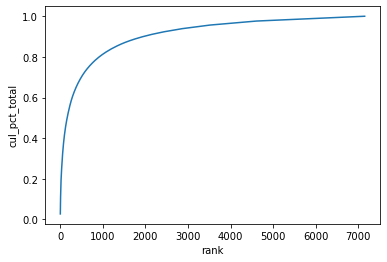

In [35]:
sns.lineplot(x='rank', y='cul_pct_total', data=word_count);

# Vectorization

## Definitions

Define the following terms in your own words, do not simply copy and paste a definition found elsewhere but reword it to be understandable and memorable to you. *Double click the markdown to add your definitions.*
<br/><br/>

**Vectorization**: `Creating vectors from documents`

**Document Term Matrix (DTM)**: ` Document Term Matrices (DTM). Each column represents a word. Each row represents a document. The value in each cell can be range of different things.`

**Latent Semantic Analysis**: `Taking the semantic meaning from text in order to interprety sentiment`

**Term Frequency - Inverse Document Frequency (TF-IDF)**: `The purpose of TF-IDF is to find what is unique to each document. Because of this we will penalize the term frequencies of words that are common across all documents which will allow for each document's most different topics to rise to the top`

**Word Embedding**: `Your Answer Here`

**N-Gram**: `continuous`

**Skip-Gram**: `uses the context word for a given target word`

## Questions of Understanding

1. Why do we need to vectorize our documents?
```
Your Answer Here
```

2. How is TF-IDF different from simple word frequency? Why do we use TF-IDF over word frequency?
```
Your Answer Here
```

3. Why might we choose a word embedding approach over a bag-of-words approach when it comes to vectorization?
```
Your Answer Here
```

## Practice Problems

Use the dataframe `df` above to complete the following.

Vectorize the `Tokens` column.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=3, 
                        tokenizer=tokenize)

dtm = tfidf.fit_transform(df.Description)
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

Build a Nearest Neighbors model from your dataframe and then find the 5 nearest neighbors to the strain "100-OG"

In [11]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [12]:
nn.kneighbors([dtm.iloc[56]])


(array([[0., 1., 1., 1., 1.]]), array([[  56, 1607, 1606, 1698, 1605]]))

In [13]:
df['Description'][1698]

'Purple Kush is a pure indica strain that emerged from the Oakland area of California as the result of a Hindu Kush and Purple Afghani cross. Its aroma is subtle and earthy with sweet overtones typical of Kush varieties. Blissful, long-lasting euphoria blankets the mind while physical relaxation rids the body of pain, sleeplessness, and stress. Purple Kush will grow wide rather than tall, and will be ready for harvest following an 8 week flowering time.'

You will be putting together a classification model below, but before you do you'll need a baseline. Run the line of code below and then find the normalized value counts for the `Rating` column in `df`.

In [17]:
df['Rating'] = df['Rating'].round().astype(int)

In [18]:
df['Rating'].value_counts(normalize=True)

4    0.601669
5    0.357049
0    0.028986
3    0.010979
2    0.000878
1    0.000439
Name: Rating, dtype: float64

What is the baseline accuracy?
```
The baseline is a 4 rating, at 60% accuracy```

Visualize the rating counts from above

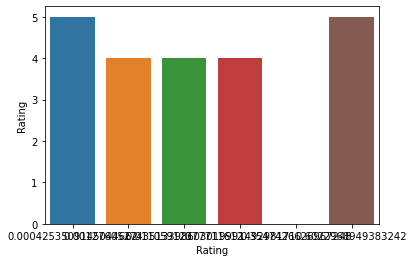

In [15]:
import seaborn as sns

sns.barplot(x=df['Rating'].value_counts(normalize=True), y=df['Rating'], data=df)

Use your vectorized tokens in the `df` dataframe to train a classification model

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
gbc = GradientBoostingClassifier()

                       
pipe = Pipeline([(['vect', vect]), (['bgc', gbc])])


In [20]:
pipe.fit(df.Description, df.Rating)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_patte...
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
          

In [21]:
pipe.score(df.Description, df.Rating)

0.8722002635046113

<!-- Predict the score of the fake strain description below.
 -->
```
'Afgooey, also known as Afgoo, is a potent indica strain that is believed to descend from an Afghani indica and Maui Haze. 
Its sativa parent may lend Afgoo some uplifting, creative qualities, but this strain undoubtedly takes after its indica 
parent as it primarily delivers relaxing, sleepy effects alongside its earthy pine flavor. Growers hoping to cultivate Afgoo 
may have a better chance of success indoors, but this indica can also thrive in Mediterranean climates outdoors.'
```

In [70]:
new_strain = ["""Afgooey, also known as Afgoo, is a potent indica strain that is believed to descend from an Afghani indica and Maui Haze. 
Its sativa parent may lend Afgoo some uplifting, creative qualities, but this strain undoubtedly takes after its indica 
parent as it primarily delivers relaxing, sleepy effects alongside its earthy pine flavor. Growers hoping to cultivate Afgoo 
may have a better chance of success indoors, but this indica can also thrive in Mediterranean climates outdoors."""]



In [71]:
pipe.predict(new_strain)

array([4])

# Topic Modeling

## Questions of Understanding

1. What is Latent Dirichlet Allocation? What is another name for LDA in NLP?
```
A statistical model that interprets the data in order to create topics based on the relatioships btw those topics
```

2. How do interpret the results of a topic modeling output?
```
The results show the relationship btw different type of words and their comparison to
```

## Practice Problems

Find the top 5 topics of the `Description` column using LDA

In a short paragraph, explain how to interpret the first topic your model came up with. If your topic words are difficult to interpret, explain how you could clean up the descriptions to improve your topics

```
Your Answer Here
```

Use `pyLDAvis` to create a visualization to help you interpret your topic modeling results

Explain how to interpret the results of `pyLDAvis`

```
Your Answer Here
```

Create at least 1 more visualization to help you interpret the results of your topic modeling